<b>BALANCEAMENTO  :</b> Undersampling

<b>CODIFICACAO:</b> One-Hot Encoding

<b>ALGORITMO:</b> Arvore de Decisao

<B>CRITÉRIO:</B> Gini

---

## Bibliotecas

In [2]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn import tree
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold

---

## Importando os Dados
* Oversampling

In [9]:
df = pd.read_csv("../Database/3.Dados_Transformados/Round2_dados_UnderSampling_OneHot.csv")

In [14]:
X = df.values[:,:33] # Atributos
y = df.values[:,33]  # Rotulo

## Critério de Divisão
- Gini

In [15]:
classifier = DecisionTreeClassifier(criterion = "gini",
                                    random_state = 123
                                    )

## Validação
- Hold-out

In [16]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 123)

In [17]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [18]:
print("Acurácia : ", metrics.accuracy_score(y_test, y_pred))
print("Recall   : ", metrics.recall_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("F1 Score : ", metrics.f1_score(y_test, y_pred))
print("\n\n")

Acurácia :  0.7473118279569892
Recall   :  0.7448979591836735
Precision:  0.7684210526315789
F1 Score :  0.7564766839378239





---

## Curva ROC 

In [19]:
# Predict class probabilities
predict_proba = classifier.predict_proba(X_test)

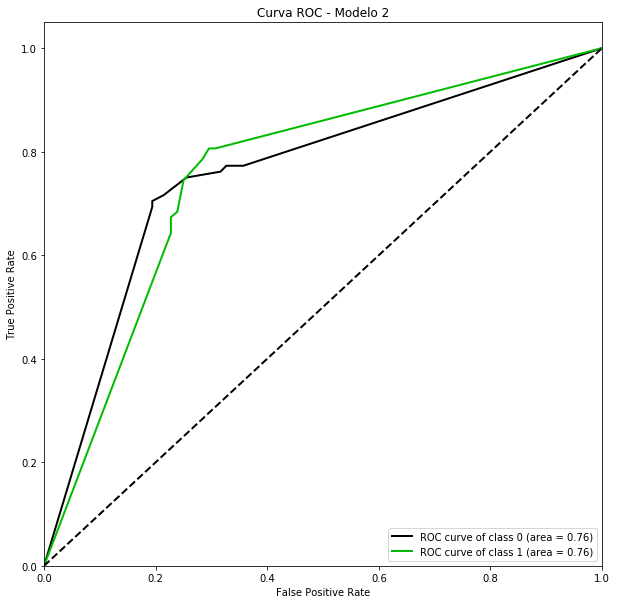

In [21]:
skplt.metrics.plot_roc(y_test, 
                       predict_proba, 
                       figsize=(10,10), 
                       title='Curva ROC - Modelo 2',
                       plot_micro=False, 
                       plot_macro=False)

plt.savefig("../5. Interpretacao/M2_CurvaROC.png", dpi=1000, transparent=True)

---

## Matriz de Confusão

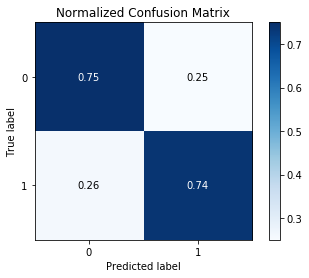

In [22]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.savefig("../5. Interpretacao/M2_MatrizConfusao.png", dpi=1000, transparent=True)

----

## Gráfico da Árvore

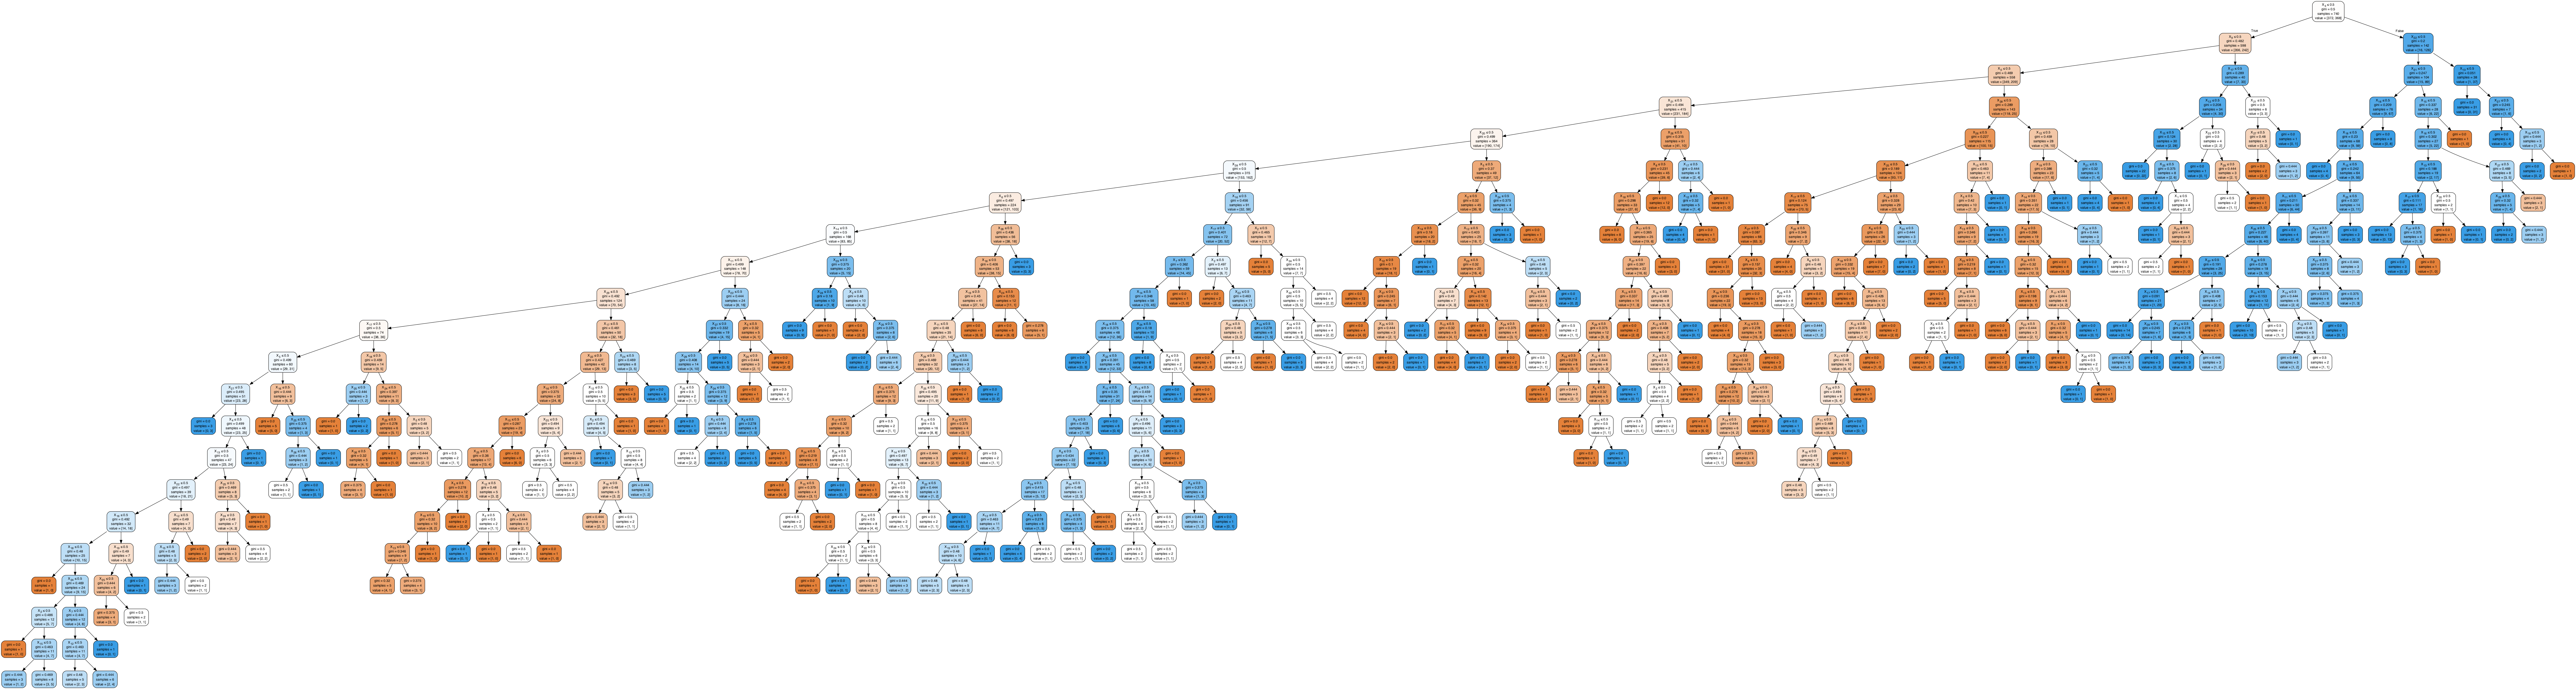

In [84]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [85]:
from sklearn import tree
dotfile = open("dt.dot", 'w')
tree.export_graphviz(classifier, out_file=dotfile, feature_names=list(df.iloc[:,0:30]), class_names=['NORMAL', 'GRAVE'], filled=True, proportion=False, rounded=True)
dotfile.close()

---

### Salvando modelo

In [115]:
import pickle
filename = "Modelos/M3_Undersampling_OneHot_Arvore.sav"
pickle.dump(classifier, open(filename, 'wb'))

---